Creación de funciones para ejecutar algoritmos de búsqueda y visualización en grafos.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import heapq
import networkx as nx
# Reading the maze


# Find start and end points
def find_points(maze):
    start = None
    end = None
    for row in range(len(maze)):
        for col in range(len(maze[0])):
            if maze[row][col] == 'E':
                start = (row, col)
            elif maze[row][col] == 'S':
                end = (row, col)
    return start, end

# Convert the maze into a graph representation
def maze_to_graph(maze):
    graph = {}
    rows, cols = len(maze), len(maze[0])
    
    for row in range(rows):
        for col in range(cols):
            if maze[row][col] != '#':
                graph[(row, col)] = []
                # Check the four possible directions (up, down, left, right)
                for r, c in [(row-1, col), (row+1, col), (row, col-1), (row, col+1)]:
                    if 0 <= r < rows and 0 <= c < cols and maze[r][c] != '#':
                        graph[(row, col)].append((r, c))
    
    return graph

# Breadth-First Search (BFS) Algorithm
def bfs(graph, start, end):
    queue = deque([([start], start)])  # Store the path and the current node
    visited = set([start])
    
    while queue:
        path, current_node = queue.popleft()
        
        if current_node == end:
            return path  # Return the path when we reach the end
        
        for neighbor in graph[current_node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((path + [neighbor], neighbor))
    
    return None  # If no path is found

# Depth-First Search (DFS) Algorithm
def dfs(graph, start, end):
    stack = [([start], start)]  # Store the path and the current node
    visited = set([start])
    
    while stack:
        path, current_node = stack.pop()
        
        if current_node == end:
            return path  # Return the path when we reach the end
        
        for neighbor in graph[current_node]:
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append((path + [neighbor], neighbor))
    
    return None  # If no path is found


# A* Algorithm
def a_star_shortest_path(graph, start, goal, heuristic_type="manhattan"):
    def heuristic(node, goal):
        if heuristic_type == "manhattan":
            return abs(node[0] - goal[0]) + abs(node[1] - goal[1])
        elif heuristic_type == "euclidean":
            return ((node[0] - goal[0]) ** 2 + (node[1] - goal[1]) ** 2) ** 0.5

    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    nodes_explored = 0

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, nodes_explored

        nodes_explored += 1

        for neighbor in graph[current]:
            tentative_g_score = g_score[current] + 1  
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None, nodes_explored

# Plot solution
def plot_solution(maze, bfs_path=None, dfs_path=None, astar_path=None):
    rows, cols = len(maze), len(maze[0])
    grid = np.zeros((rows, cols))
    
    # Mark walls in black
    for row in range(rows):
        for col in range(cols):
            if maze[row][col] == '#':
                grid[row, col] = 1
    
    fig, ax = plt.subplots(figsize=(20, 30))
    ax.imshow(grid, cmap='gray')

    # Plot BFS in blue
    if bfs_path:
        bfs_path_rows, bfs_path_cols = zip(*bfs_path)
        ax.plot(bfs_path_cols, bfs_path_rows, color='blue', linewidth=4, label='Camino BFS')

    # Plot DFS in red
    if dfs_path:
        dfs_path_rows, dfs_path_cols = zip(*dfs_path)
        ax.plot(dfs_path_cols, dfs_path_rows, color='red', linestyle='--', linewidth=4, label='Camino DFS')

    # Plot A* in green
    if astar_path:
        astar_path_rows, astar_path_cols = zip(*astar_path)
        ax.plot(astar_path_cols, astar_path_rows, color='green', linestyle=':', linewidth=4, label='Camino A*')

    # Mark start and end
    start, end = find_points(maze)
    ax.scatter(start[1], start[0], color='yellow', label='Inicio (E)', s=100)
    ax.scatter(end[1], end[0], color='orange', label='Fin (S)', s=100)

    ax.set_xticks(np.arange(-0.5, cols, 1))
    ax.set_yticks(np.arange(-0.5, rows, 1))
    ax.grid(True, which='both')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

def plot_graph(graph, bfs_path=None, dfs_path=None, a_star_path=None, start=None, end=None):
    G = nx.Graph()
    G.add_nodes_from(graph.keys())
    
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)
    
    pos = {(r, c): (c, -r) for r, c in graph.keys()}  # Position of nodes for plotting
    
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, node_color='lightgray', node_size=20, with_labels=False, edge_color='gray')

    # Draw BFS path in blue
    if bfs_path:
        edges_bfs = [(bfs_path[i], bfs_path[i+1]) for i in range(len(bfs_path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges_bfs, edge_color='blue', width=3, label='BFS Path')

    # Draw DFS path in red
    if dfs_path:
        edges_dfs = [(dfs_path[i], dfs_path[i+1]) for i in range(len(dfs_path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges_dfs, edge_color='red', width=3, style='dashed', label='DFS Path')

    # Draw A* path in green
    if a_star_path:
        edges_a_star = [(a_star_path[i], a_star_path[i+1]) for i in range(len(a_star_path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges_a_star, edge_color='green', width=3, style='dotted', label='A* Path')

    # Mark start and end nodes
    nx.draw_networkx_nodes(G, pos, nodelist=[start], node_color='green', node_size=700, label='Start (E)')
    nx.draw_networkx_nodes(G, pos, nodelist=[end], node_color='yellow', node_size=700, label='End (S)')

    plt.title("Solucion del Laberinto con el metodo BFS / A* /DFS")
    plt.legend()
    plt.show()


Resolución del laberinto 1

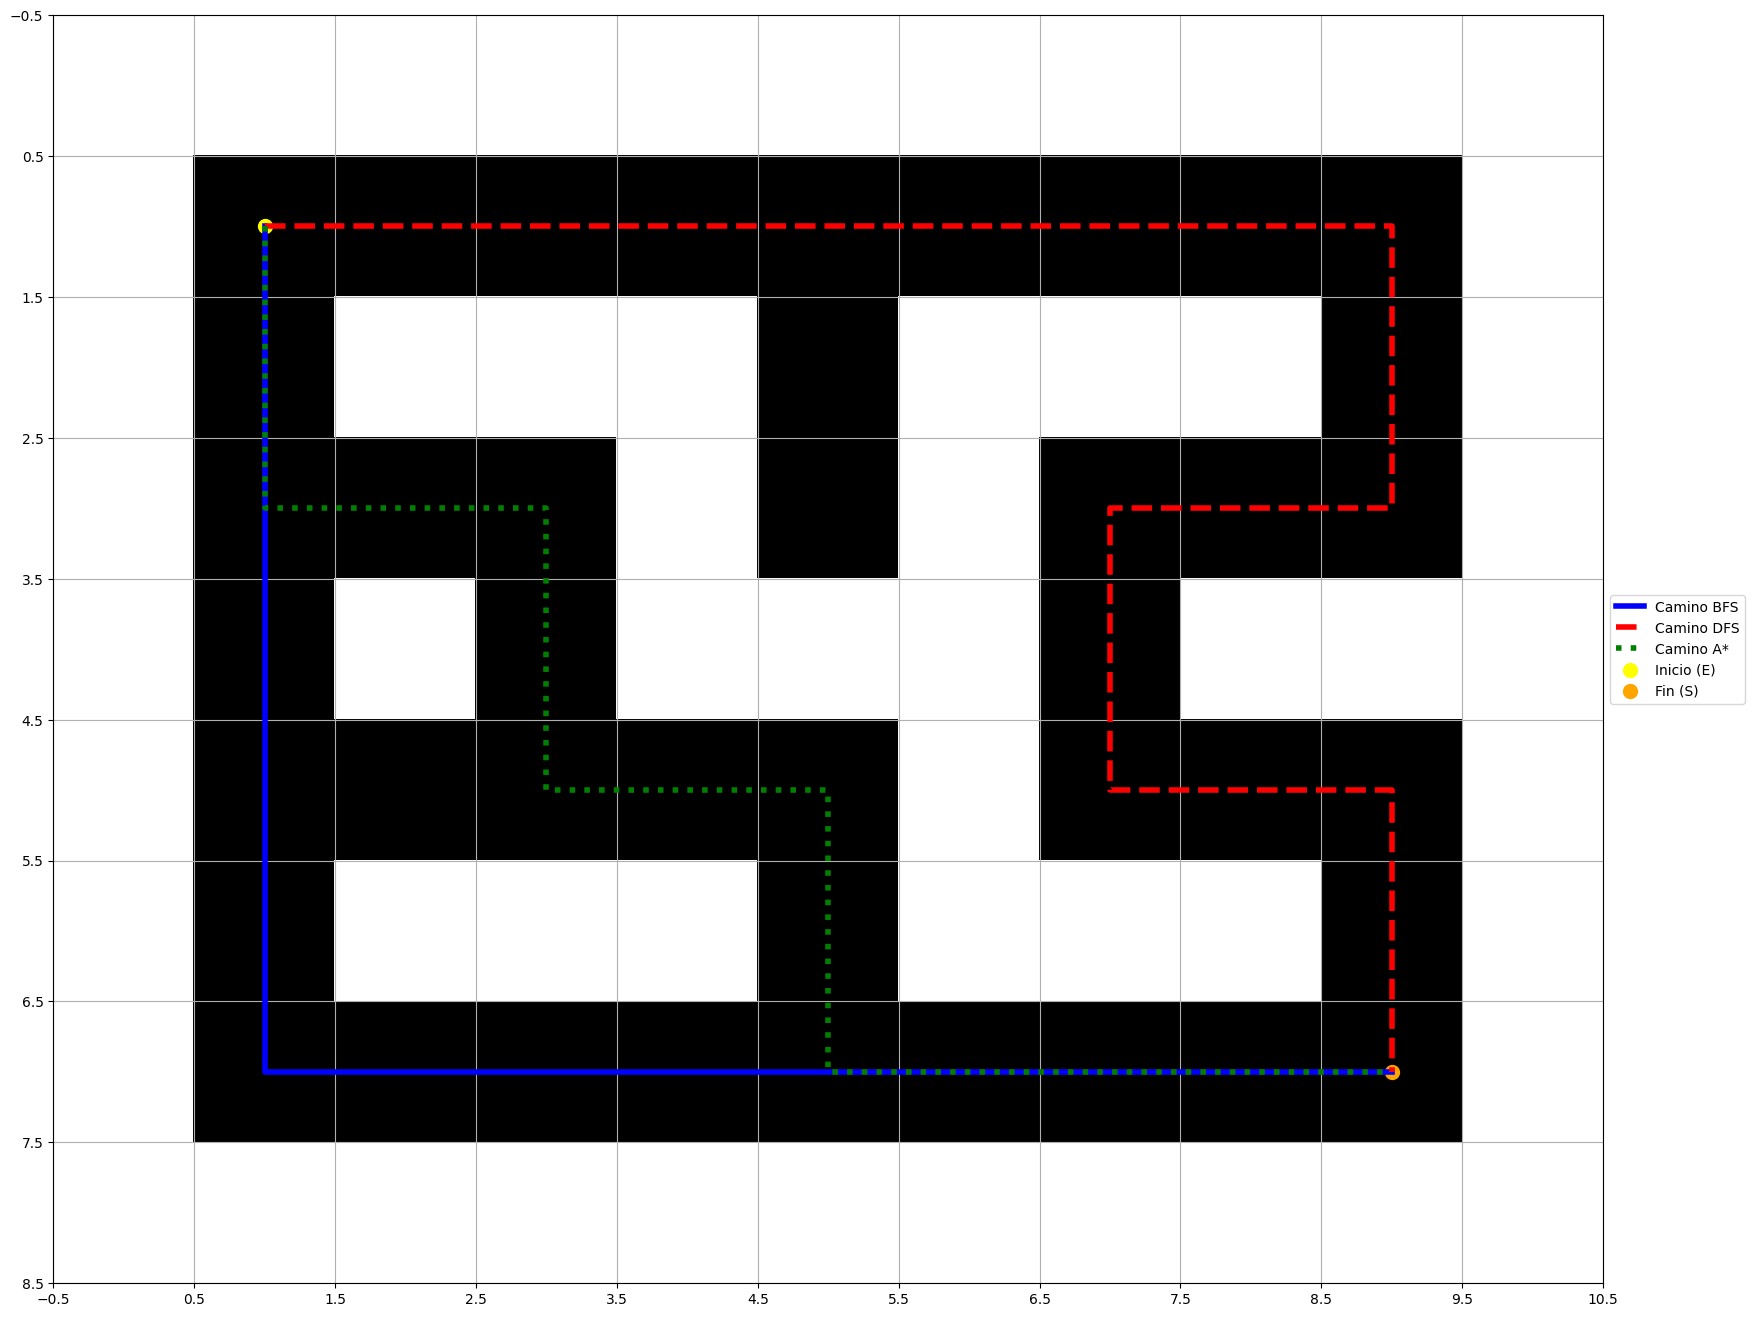

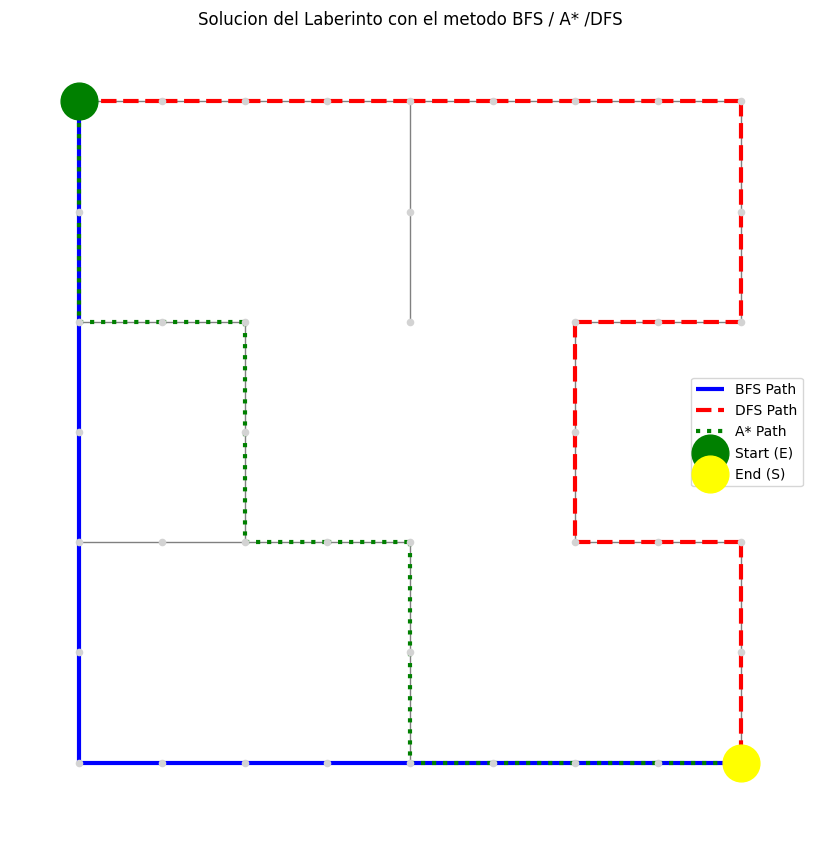

In [2]:
maze = [
    "###########",
    "#E        #",
    "# ### ### #",
    "#   # #   #",
    "# # ### ###",
    "#     #   #",
    "# ### ### #",
    "#        S#",
    "###########"
]

# Main Execution
start, end = find_points(maze)
graph = maze_to_graph(maze)

bfs_path = bfs(graph, start, end)
dfs_path = dfs(graph, start, end)
a_star_path, _ = a_star_shortest_path(graph, start, end)


plot_solution(maze, bfs_path=bfs_path, dfs_path=dfs_path, astar_path=a_star_path)
plot_graph(graph, bfs_path=bfs_path, dfs_path=dfs_path, a_star_path=a_star_path, start=start, end=end)

Resolución del laberinto 2

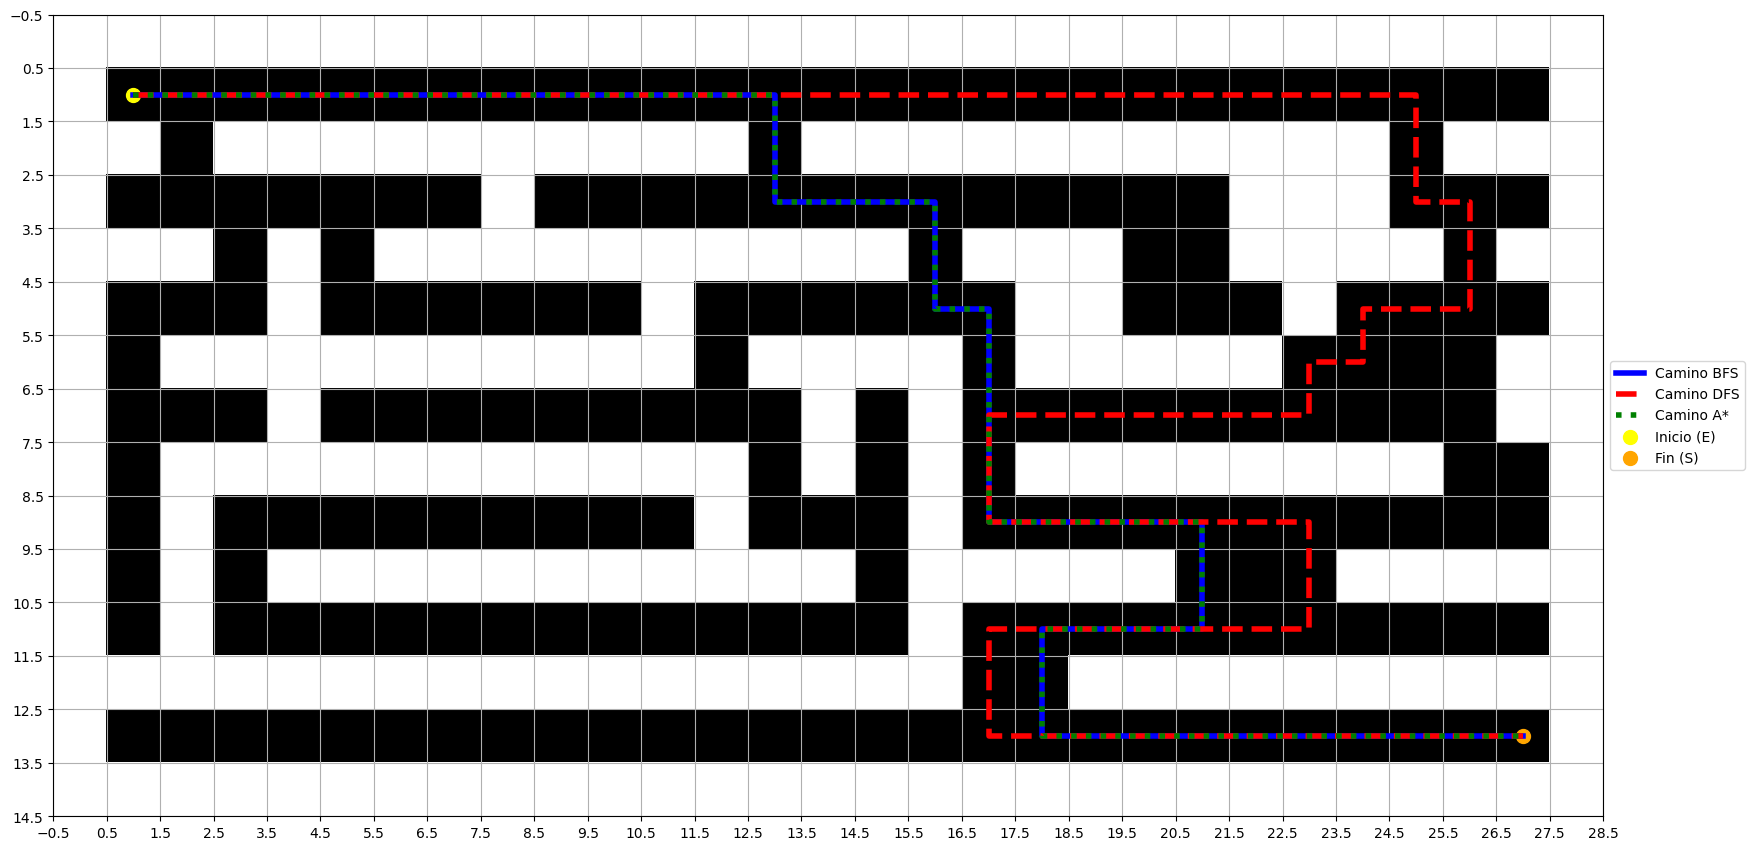

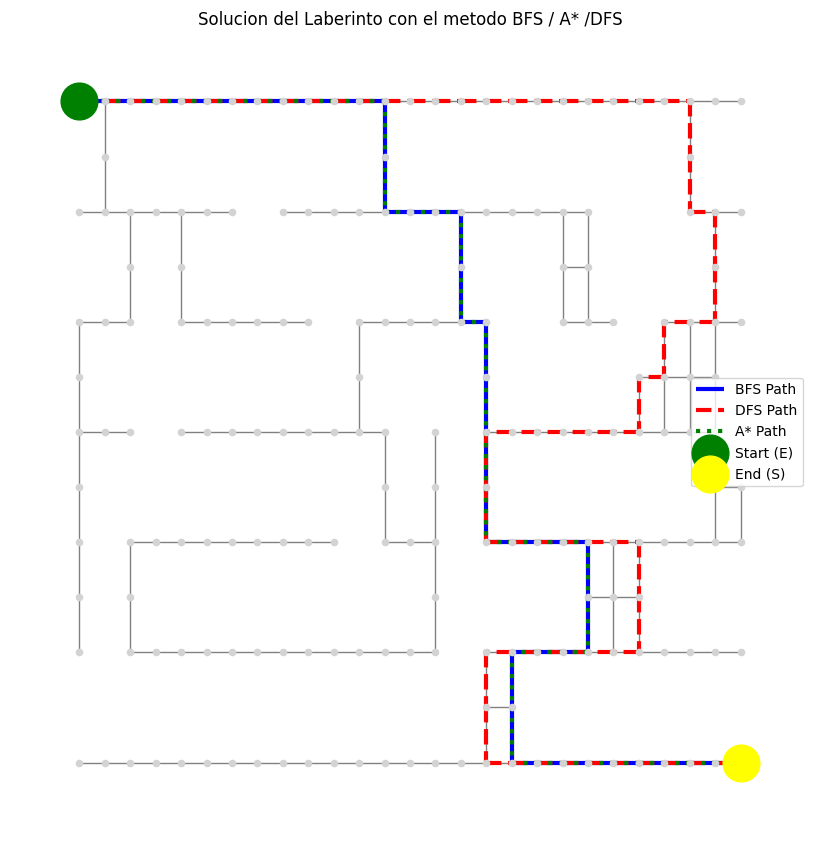

In [3]:
maze = [
    "#############################",
    "#E                          #",
    "## ########## ########### ###",
    "#       #             ###   #",
    "### # ########## ###  #### ##",
    "#   #      #      ##   #    #",
    "# ########## #### #####    ##",
    "#   #         # #          ##",
    "# ########### # # ########  #",
    "# #         #   #           #",
    "# # ########### #####   #####",
    "# #             #           #",
    "#################  ##########",
    "#                          S#",
    "#############################"
]

# Main Execution
start, end = find_points(maze)
graph = maze_to_graph(maze)

bfs_path = bfs(graph, start, end)
dfs_path = dfs(graph, start, end)
a_star_path, _ = a_star_shortest_path(graph, start, end)

plot_solution(maze, bfs_path=bfs_path, dfs_path=dfs_path, astar_path=a_star_path)
plot_graph(graph, bfs_path=bfs_path, dfs_path=dfs_path, a_star_path=a_star_path, start=start, end=end)

Resolución del laberinto 3

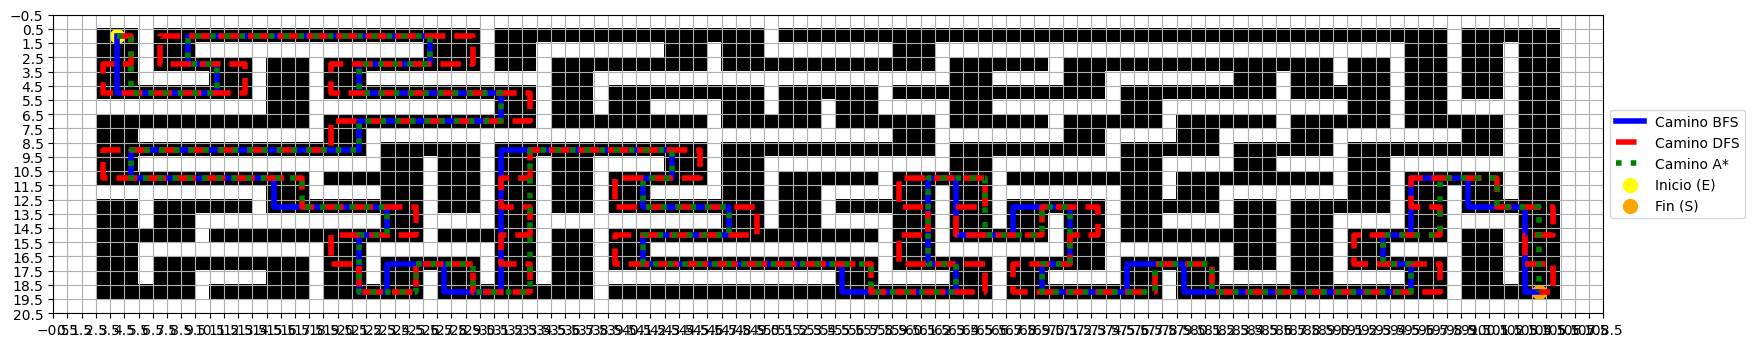

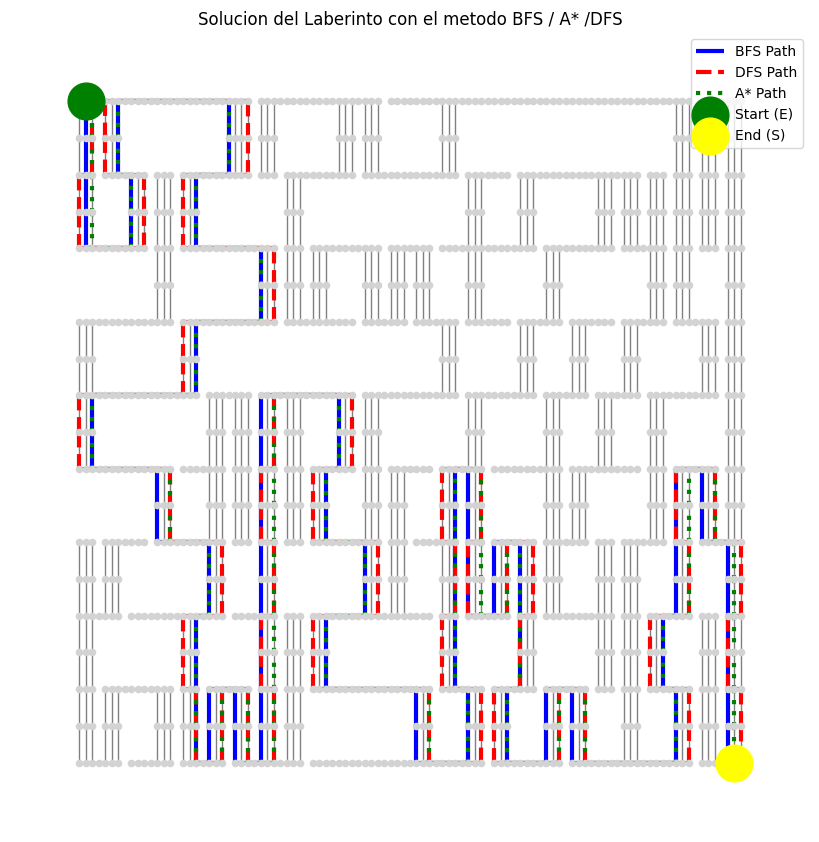

In [4]:
maze = [
"#############################################################################################################",
"### E #                       #                   #                                               #       ###",
"###   #   ################    #   #########   #   #########   #################################   #   #   ###",
"###   #       #   #           #   #           #               #       #                   #   #   #   #   ###",
"###   #####   #   #   #############   #########################   #####   #########   #   #   #   #   #   ###",
"###           #   #               #   #           #       #               #           #       #   #   #   ###",
"###############   #############   #   #   #####   #   #   #####   #########   #############   #   #####   ###",
"###               #               #           #       #       #       #       #       #       #       #   ###",
"###   #############   #####################################   #########   #####   #####   #########   #   ###",
"###                   #       #               #               #           #       #       #           #   ###",
"###   #################   #   #   #   #####   #   #############   #########   #####   #####   #########   ###",
"###               #       #   #   #   #       #   #       #       #           #           #   #       #   ###",
"###############   #####   #   #   #   #   #####   #   #####   #   #########   #   #########   #   #   #   ###",
"###   #       #           #   #   #   #           #   #       #   #       #       #   #       #   #       ###",
"###   #   #############   #####   #############   #   #####   #   #   #   #   #####   #   #####   #####   ###",
"###       #               #       #   #                   #   #       #   #           #   #       #   #   ###",
"###   #############   #########   #   #   #################   #########   #########   #   #   #####   #   ###",
"###   #           #   #       #   #   #                   #       #       #       #   #   #       #   #   ###",
"###   #   #####   #   #   #   #   #   #################   #####   #   #####   #   #####   #####   #   #   ###",
"###       #       #       #           #                           #           #                   #     S ###",
"#############################################################################################################",
]

# Main Execution
start, end = find_points(maze)
graph = maze_to_graph(maze)

bfs_path = bfs(graph, start, end)
dfs_path = dfs(graph, start, end)
a_star_path, _ = a_star_shortest_path(graph, start, end)

plot_solution(maze, bfs_path=bfs_path, dfs_path=dfs_path, astar_path=a_star_path)
plot_graph(graph, bfs_path=bfs_path, dfs_path=dfs_path, a_star_path=a_star_path, start=start, end=end)

Gráficas comparativas para cada algoritmo respecto al tiempo de ejecución, nodos explorados y longitud de la solución.

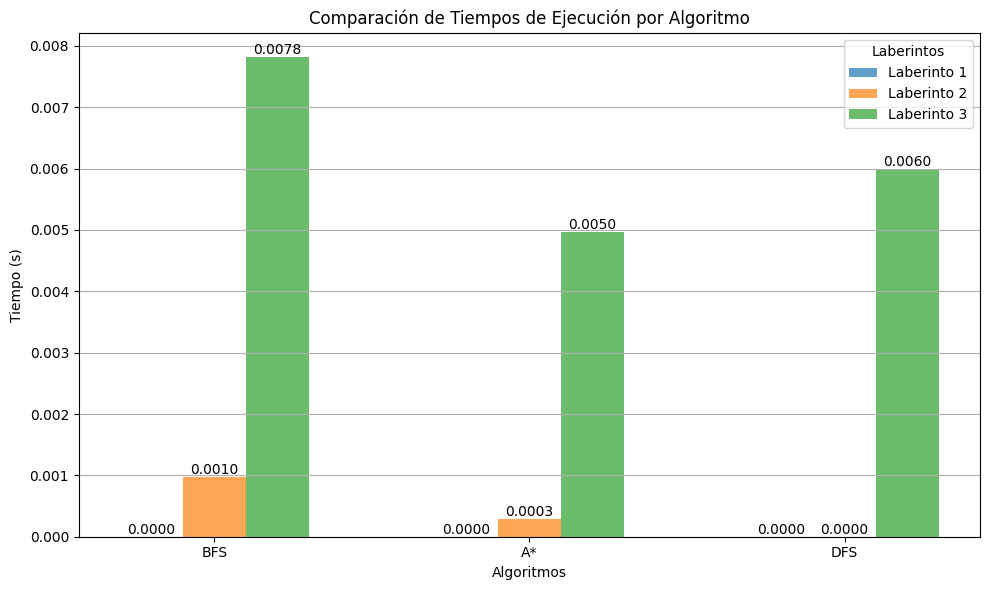

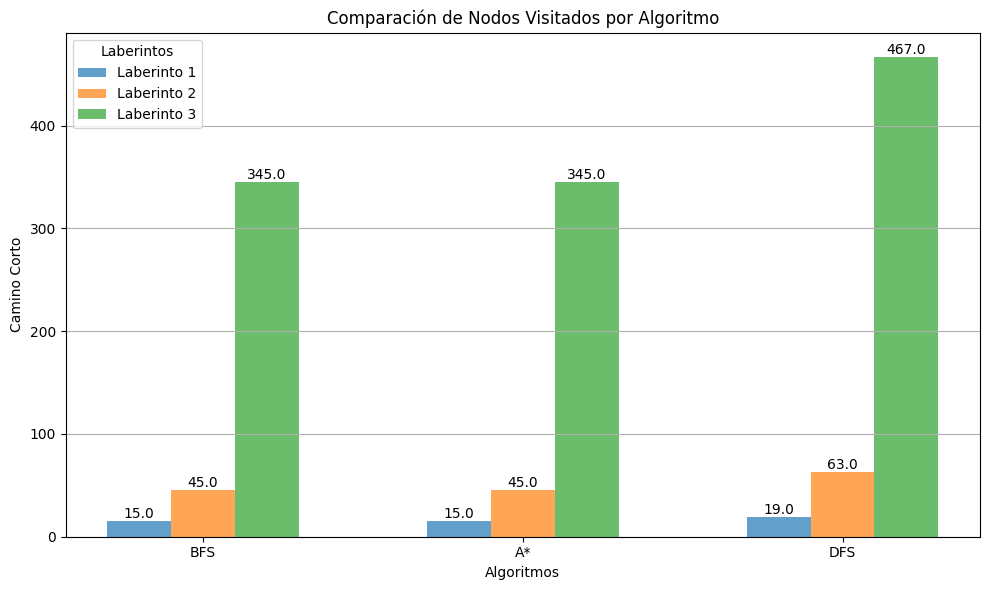

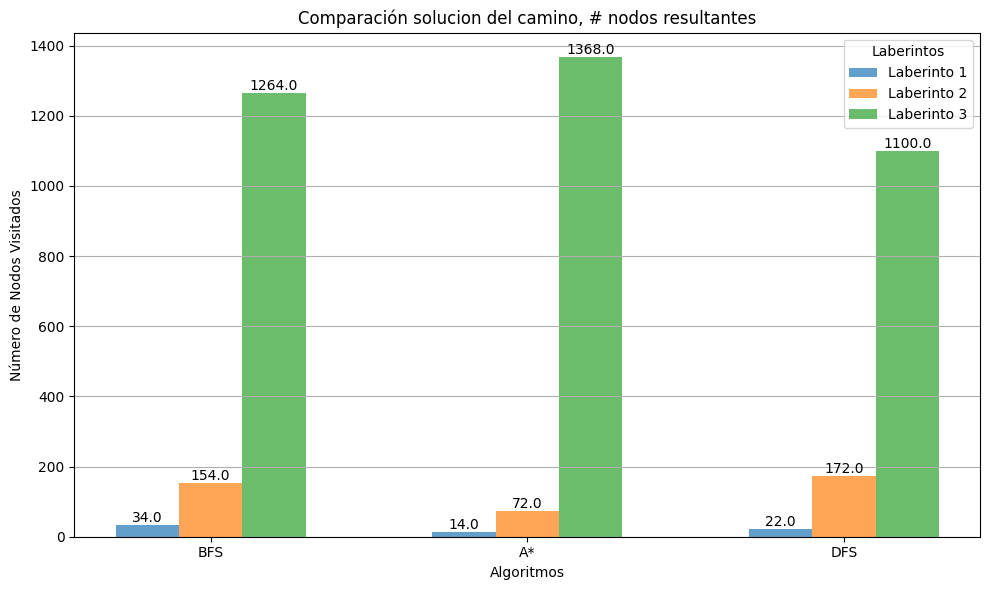

In [6]:
import time

def a_star_shortest_path(graph, start, goal, heuristic_type="manhattan"):
    def heuristic(node, goal):
        if heuristic_type == "manhattan":
            return abs(node[0] - goal[0]) + abs(node[1] - goal[1])
        elif heuristic_type == "euclidean":
            return ((node[0] - goal[0]) ** 2 + (node[1] - goal[1]) ** 2) ** 0.5

    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    nodes_explored = 0

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return path, nodes_explored

        nodes_explored += 1

        for neighbor in graph[current]:
            tentative_g_score = g_score[current] + 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None, nodes_explored

def dfs_shortest_path(graph, start, goal):
    """
    Implementación del algoritmo DFS para encontrar el camino desde el nodo `start` al nodo `goal`.
    """
    stack = [(start, [start])]
    visited = set()
    nodes_explored = 0

    while stack:
        (vertex, path) = stack.pop()
        if vertex in visited:
            continue

        visited.add(vertex)
        nodes_explored += 1

        for neighbor in graph.neighbors(vertex):
            if neighbor == goal:
                return path + [neighbor], nodes_explored
            else:
                stack.append((neighbor, path + [neighbor]))

    return None, nodes_explored

def bfs_shortest_path(graph, start, goal):
    queue = deque([[start]])
    visited = set()

    nodes_explored = 0

    if start == goal:
        return [start], nodes_explored

    while queue:
        path = queue.popleft()
        node = path[-1]

        if node not in visited:
            neighbors = graph[node]
            for neighbor in neighbors:
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
                if neighbor == goal:
                    return new_path, nodes_explored

            visited.add(node)
            nodes_explored += 1

    return None, nodes_explored


def compare_algorithms(graph, start_pos, end_pos):
    results = {}

    # Medir BFS
    start_time = time.time()
    bfs_path, bfs_nodes_explored = bfs_shortest_path(graph, end_pos, start_pos)
    bfs_time = time.time() - start_time
    results['BFS'] = (bfs_time, bfs_nodes_explored, len(bfs_path))

    # Medir A*
    start_time = time.time()
    a_star_path, a_star_nodes_explored = a_star_shortest_path(graph, end_pos, start_pos)
    a_star_time = time.time() - start_time
    results['A*'] = (a_star_time, a_star_nodes_explored, len(a_star_path))

    # Medir DFS
    start_time = time.time()
    dfs_path, dfs_nodes_explored = dfs_shortest_path(graph, end_pos, start_pos)
    dfs_time = time.time() - start_time
    results['DFS'] = (dfs_time, dfs_nodes_explored, len(dfs_path))

    return results


all_results = {'BFS': [], 'A*': [], 'DFS': []}

file_paths = [r'laberinto1.txt', r'laberinto2.txt', r'laberinto3.txt']

def maze_to_graph(maze):
    graph = nx.Graph()
    height = len(maze)
    width = len(maze[0])

    for y in range(height):
        for x in range(width):
            if maze[y][x] != '#':
                if x > 0 and maze[y][x - 1] != '#':
                    graph.add_edge((x, y), (x - 1, y), weight=1)
                if x < width - 1 and maze[y][x + 1] != '#':
                    graph.add_edge((x, y), (x + 1, y), weight=1)
                if y > 0 and maze[y - 1][x] != '#':
                    graph.add_edge((x, y), (x, y - 1), weight=1)
                if y < height - 1 and maze[y + 1][x] != '#':
                    graph.add_edge((x, y), (x, y + 1), weight=1)
    return graph


def load_maze(file_path):
    maze = []
    start_pos = None
    end_pos = None
    with open(file_path, 'r') as file:
        for y, line in enumerate(file):
            row = list(line.strip())
            if 'E' in row:
                start_pos = (row.index('E'), y)
            if 'S' in row:
                end_pos = (row.index('S'), y)
            maze.append(row)
    return maze, start_pos, end_pos

for file_path in file_paths:
        maze, start_pos, end_pos = load_maze(file_path)
        graph = maze_to_graph(maze)

        results = compare_algorithms(graph, start_pos, end_pos)

        # Guardar los resultados
        for algo in all_results:
            all_results[algo].append(results[algo])




# Extraer datos
algorithms = list(all_results.keys())
data = np.array([all_results[alg] for alg in algorithms])

# Definir los índices para las barras
x = np.arange(len(algorithms))
width = 0.2  # Ancho de las barras

# Gráfico de Tiempos
plt.figure(figsize=(10, 6))
for i in range(data.shape[1]):
    bars = plt.bar(x + i * width, data[:, i, 0], width, label=f'Laberinto {i+1}', alpha=0.7)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{bar.get_height():.4f}', ha='center', va='bottom')

plt.xlabel('Algoritmos')
plt.ylabel('Tiempo (s)')
plt.title('Comparación de Tiempos de Ejecución por Algoritmo')
plt.xticks(x + width, algorithms)
plt.legend(title="Laberintos")
plt.grid(axis='y')
plt.tight_layout()  # Corrección aquí
plt.show()

# Gráfico de Caminos Cortos
plt.figure(figsize=(10, 6))
for i in range(data.shape[1]):
    bars = plt.bar(x + i * width, data[:, i, 2], width, label=f'Laberinto {i+1}', alpha=0.7)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{bar.get_height()}', ha='center', va='bottom')

plt.xlabel('Algoritmos')
plt.ylabel('Camino Corto')
plt.title('Comparación de Nodos Visitados por Algoritmo')
plt.xticks(x + width, algorithms)
plt.legend(title="Laberintos")
plt.grid(axis='y')
plt.tight_layout()  # Corrección aquí
plt.show()

# Gráfico de Nodos Visitados
plt.figure(figsize=(10, 6))
for i in range(data.shape[1]):
    bars = plt.bar(x + i * width, data[:, i, 1], width, label=f'Laberinto {i+1}', alpha=0.7)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                 f'{bar.get_height()}', ha='center', va='bottom')

plt.xlabel('Algoritmos')
plt.ylabel('Número de Nodos Visitados')
plt.title('Comparación solucion del camino, # nodos resultantes')
plt.xticks(x + width, algorithms)
plt.legend(title="Laberintos")
plt.grid(axis='y')
plt.tight_layout()  # Corrección aquí
plt.show()